# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
# !pip install --user --upgrade tables
# !pip install --user pycaret
# !pip install pycaret[full]==2.3.4
!pip install pycaret
# Install or upgrade required libraries
!pip install pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.

# Get libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

Mounted at /content/drive


In [3]:
region=9
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
7641,3449027,Esperanza Dos,San Ricardo,Southern Leyte,0.576304,1.633234,0.433523,1.0,0,1,1,3436583,15.999370,2.333577,2.217862,21.310762,10.260023,4.59001,3.702865,0.650267
6062,3429662,Magaupas,Liloan,Southern Leyte,0.643150,1.549069,0.480462,1.0,0,1,1,3437951,10.553815,16.335444,26.136714,171.249924,85.216572,36.21024,24.775428,0.648034


In [4]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

In [5]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,3313430
1,3314812
2,3314813
3,3316193
4,3316194
...,...
8981,3504237
8982,3505637
8983,3507003
8984,3518072


In [6]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(8986, 1)"
2,Transformed data shape,"(8986, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


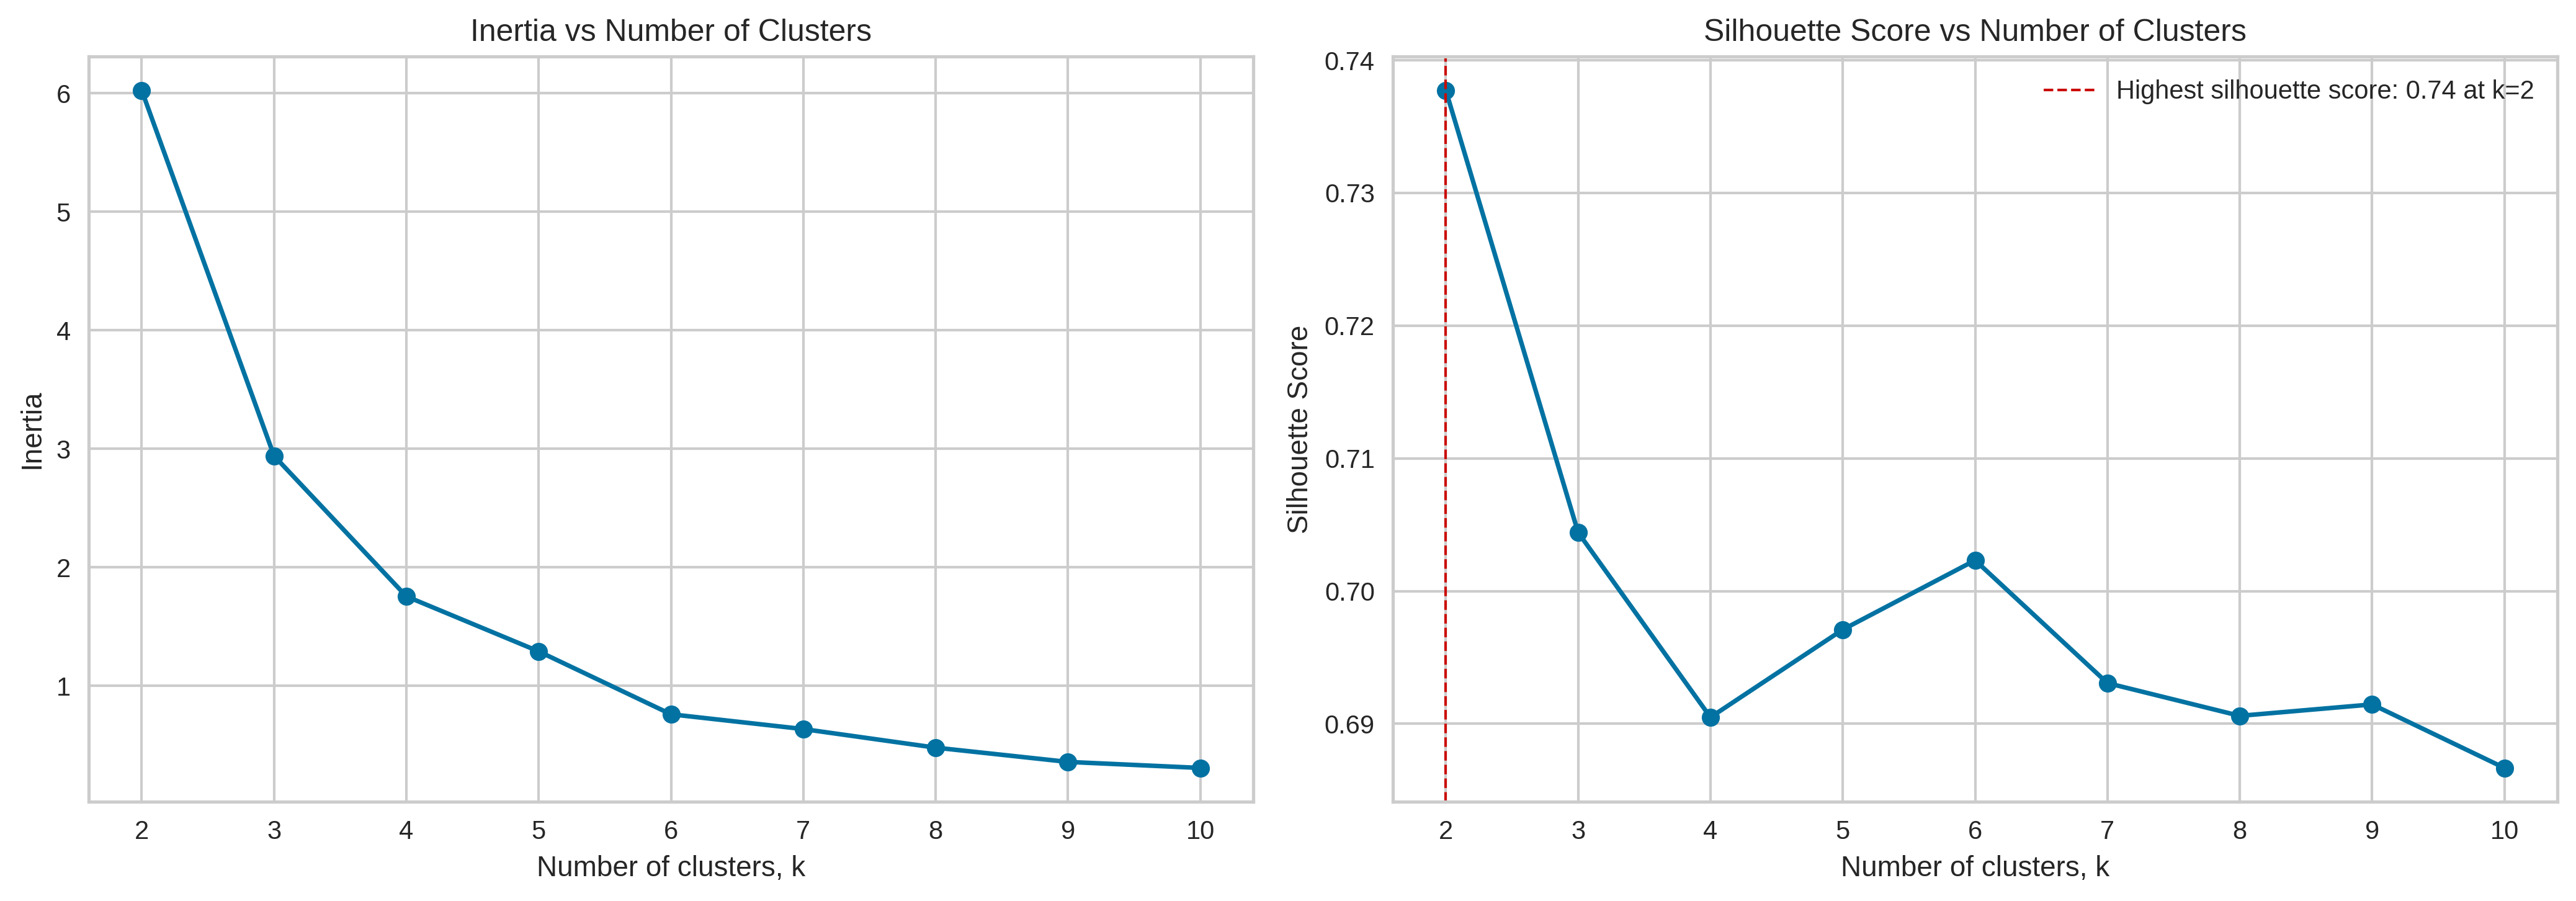

In [7]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6910,32747.5080,0.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

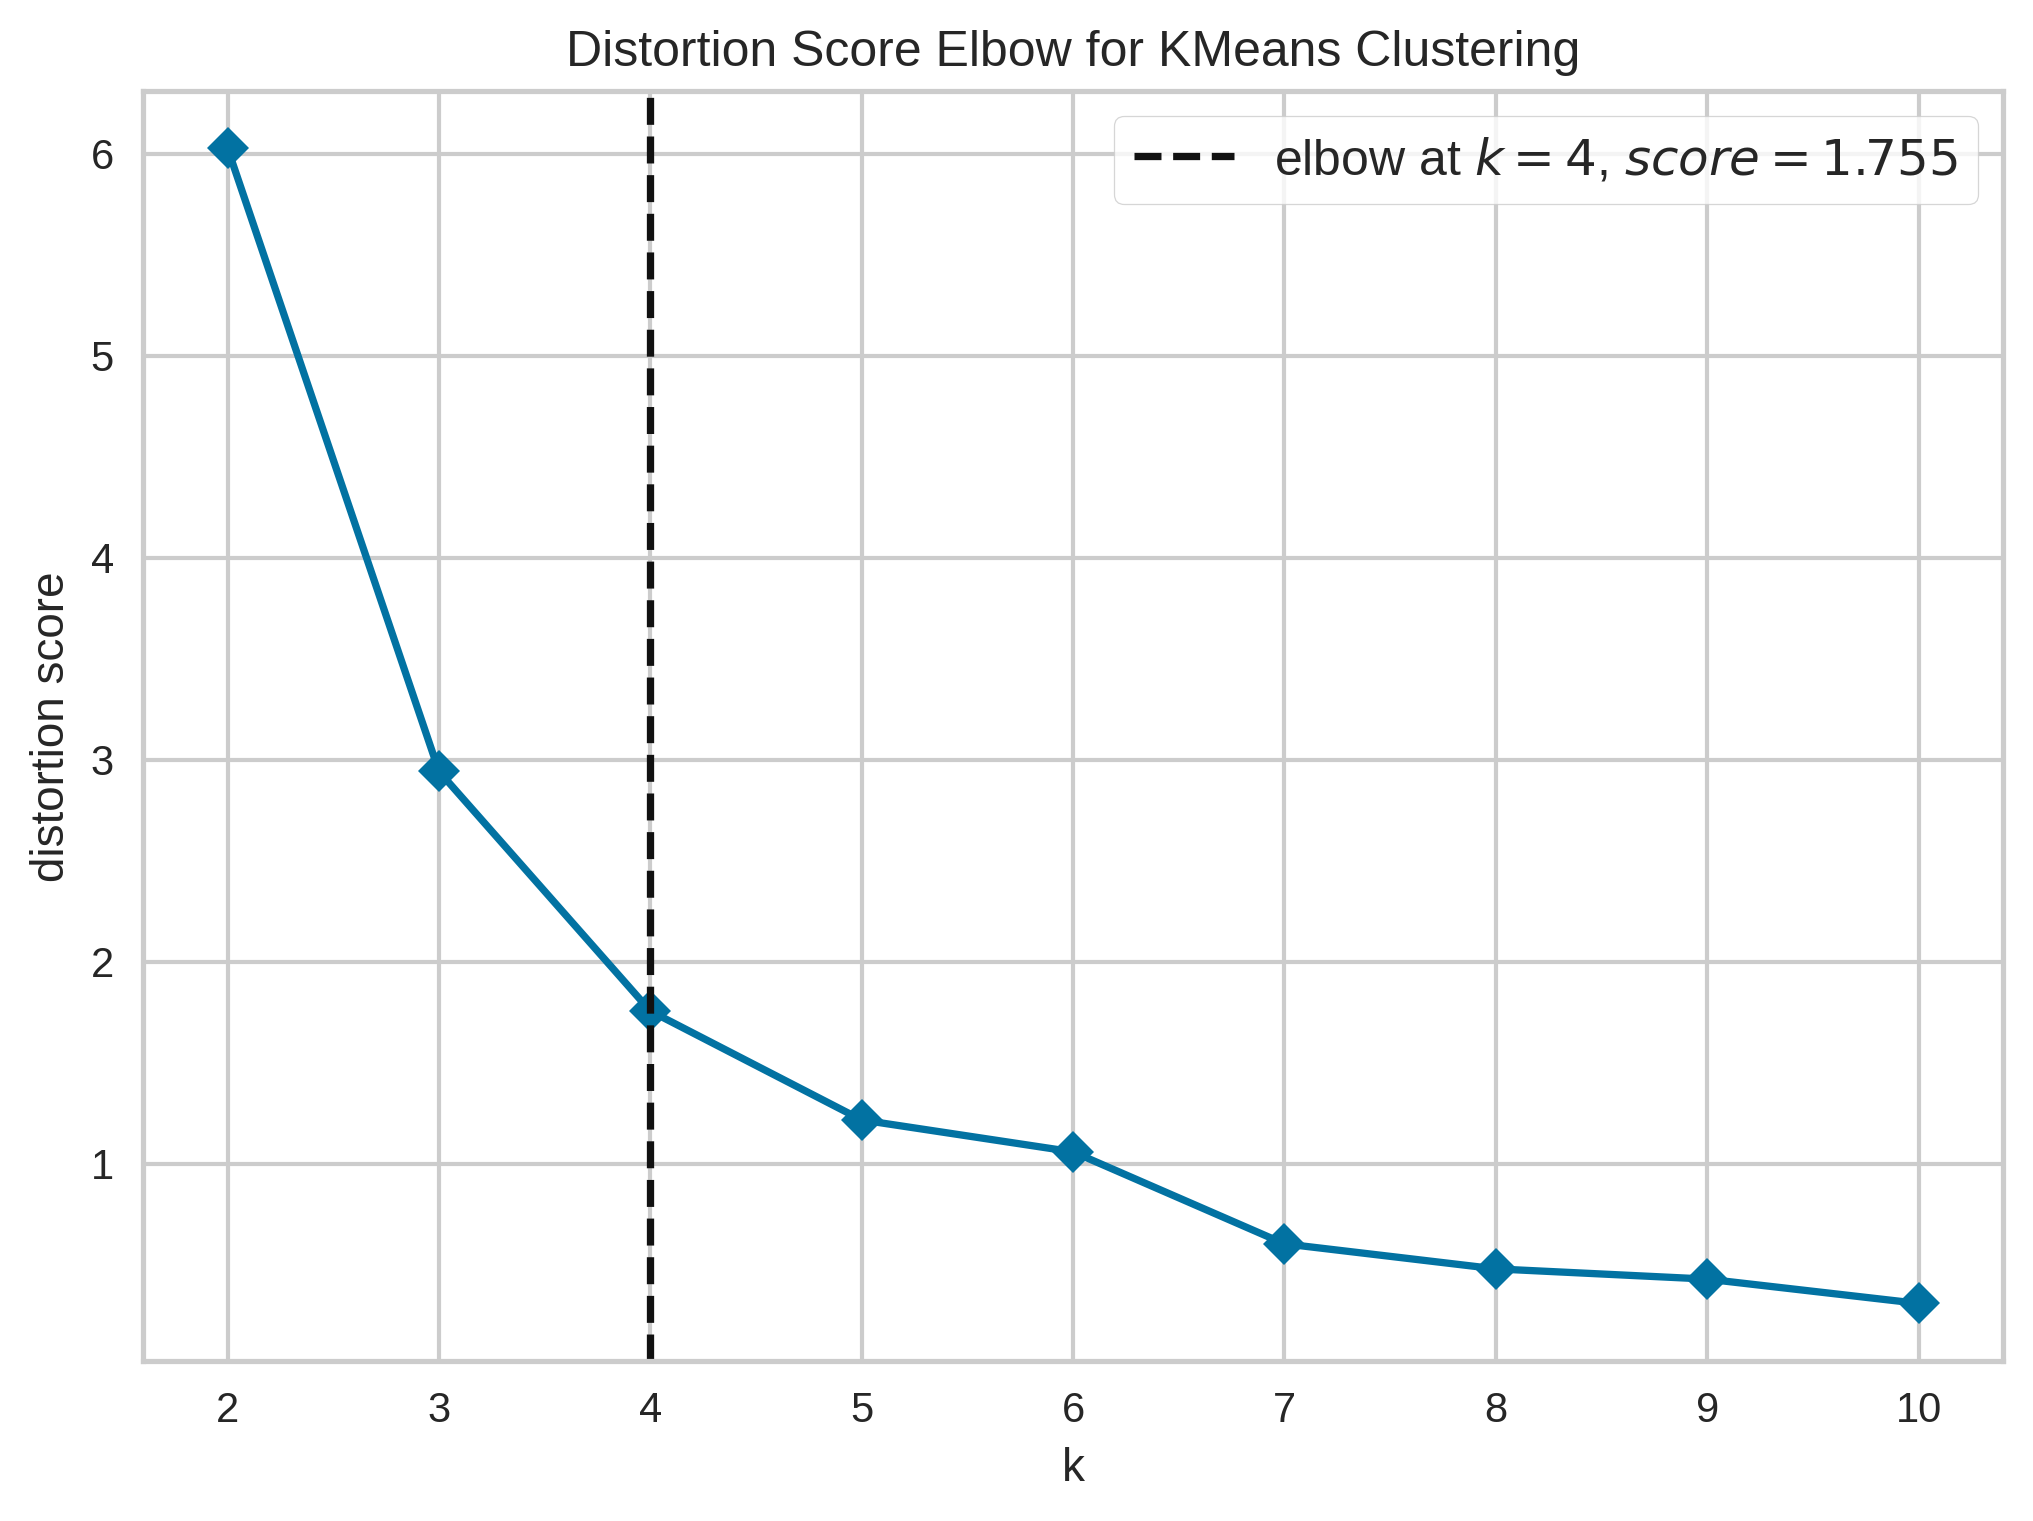

In [9]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [10]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [13]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-silhouette')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7377,22259.8703,0.3677,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.424699,Cluster 1
2,0.500000,Cluster 0
3,0.500000,Cluster 0
4,0.424699,Cluster 1
5,0.500000,Cluster 0
6,0.430135,Cluster 1
7,0.500000,Cluster 0
8,0.479061,Cluster 0
9,0.430135,Cluster 1


In [14]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-inertia')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6910,32747.5080,0.4203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.424699,Cluster 1
2,0.500000,Cluster 0
3,0.500000,Cluster 0
4,0.424699,Cluster 1
5,0.500000,Cluster 0
6,0.430135,Cluster 3
7,0.500000,Cluster 0
8,0.479061,Cluster 3
9,0.430135,Cluster 3


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.424699,Cluster 1
2,0.500000,Cluster 0
3,0.500000,Cluster 0
4,0.424699,Cluster 1
...,...,...
8981,0.392827,Cluster 1
8982,0.500000,Cluster 0
8983,0.461363,Cluster 3
8984,0.500000,Cluster 0


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

max, min, total 0.5268719792366028 | 0.4803645610809326 | 5184
max, min, total 0.4260775148868561 | 0.34841540455818176 | 1429
max, min, total 0.6502671241760254 | 0.5270875692367554 | 999
max, min, total 0.48019132018089294 | 0.4260915219783783 | 1374


,HCFAI,Accessibility Level
7641,0.650267,Cluster 2
6062,0.648034,Cluster 2
5816,0.644983,Cluster 2
5938,0.642653,Cluster 2
7233,0.640261,Cluster 2
...,...,...
3134,0.350488,Cluster 1
3283,0.350238,Cluster 1
2843,0.350128,Cluster 1
3442,0.348679,Cluster 1


## Modify

In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
x = x.replace(['Cluster 3'],int(0))

x['ID'] = IDdf

df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,3313430,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,19.160349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,3314812,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,16.402226,10.919576,19.932560,124.968488,62.917560,26.345644,21.145848,0.424699,0.424699,0
2,3314813,Sila,San Vicente,Northern Samar,1.470177,1.547435,0.429685,0.0,0,0,...,17.733638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
3,3316193,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,15.696258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
4,3316194,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,15.889344,2.360123,4.308162,27.010301,13.598806,5.694266,4.570398,0.424699,0.424699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,3504237,Ngolos,Guiuan,Eastern Samar,3.142842,1.754262,0.584311,0.0,0,0,...,46.986907,0.984148,0.680468,7.912546,3.801621,1.782713,1.366559,0.392827,0.392827,0
8982,3505637,Cagusu-an,Guiuan,Eastern Samar,2.160672,1.754547,0.564089,0.0,0,0,...,62.553435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
8983,3507003,Sulangan,Guiuan,Eastern Samar,3.232944,1.746120,0.587511,0.0,0,0,...,50.731541,118.603833,84.144597,999.317445,505.669059,212.364957,147.453414,0.461363,0.461363,0
8984,3518072,Suluan,Guiuan,Eastern Samar,2.965111,1.737982,0.569467,0.0,0,0,...,70.953292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,3313430,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,3330011,19.160349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,3314812,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,3330011,16.402226,10.919576,19.932560,124.968488,62.917560,26.345644,21.145848,0.424699,0
2,3314813,Sila,San Vicente,Northern Samar,1.470177,1.547435,0.429685,0.0,0,0,...,3330011,17.733638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
3,3316193,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,3330011,15.696258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
4,3316194,Maragat,San Vicente,Northern Samar,1.851208,1.533578,0.448349,0.0,0,0,...,3330011,15.889344,2.360123,4.308162,27.010301,13.598806,5.694266,4.570398,0.424699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,3504237,Ngolos,Guiuan,Eastern Samar,3.142842,1.754262,0.584311,0.0,0,0,...,3460006,46.986907,0.984148,0.680468,7.912546,3.801621,1.782713,1.366559,0.392827,0
8982,3505637,Cagusu-an,Guiuan,Eastern Samar,2.160672,1.754547,0.564089,0.0,0,0,...,3460006,62.553435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
8983,3507003,Sulangan,Guiuan,Eastern Samar,3.232944,1.746120,0.587511,0.0,0,0,...,3460006,50.731541,118.603833,84.144597,999.317445,505.669059,212.364957,147.453414,0.461363,0
8984,3518072,Suluan,Guiuan,Eastern Samar,2.965111,1.737982,0.569467,0.0,0,0,...,3460006,70.953292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0


In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')